<a href="https://colab.research.google.com/github/Uniquely-Rare/BunkBot/blob/main/My_Fashion_MNIST_Notebook_(5th_Feb'19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

*   To import the Fashion MNIST dataset using tensorflow
*   To plot the Fashion MNIST images
*   To build a classification model which will be able to identify the different categories of the fashion industry from the Fashion MNIST dataset using Tensorflow and Keras




# Data Analysis

## Importing the required libraries



*   NumPy
*   Matplotlib
*   Tensorflow 
*   Keras 



**Importing Fashion MNIST dataset using Tensorflow**

---



In [ ]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

**Importing tensorflow**


---





In [ ]:
# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten
 
# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

## Exploring Dataset

**Shape**


---



In [ ]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainy.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testy.shape))


Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


**Visualise**

---

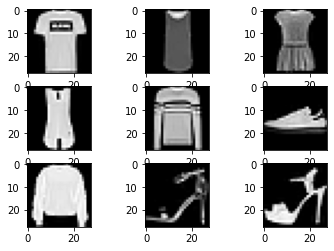

In [ ]:

for i in range(1, 10):
   
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
     
    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

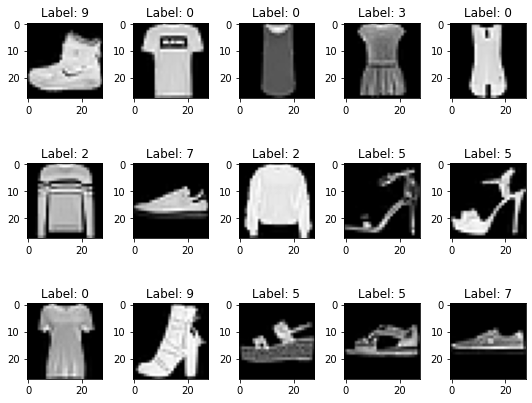

In [ ]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# Training

## Creating the model
CNN model

---

### Function

In [ ]:
def model_arch():
    models = Sequential()
 
    # We are learning 64
    # filters with a kernal size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))
 
    # Max pooling will reduce the
    # size with a kernal size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))
 
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))
 
    models.add(MaxPooling2D(pool_size=(2, 2)))
 
    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))
 
    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

### Summury

In [ ]:
model = model_arch()
 
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

## Fitting

In [ ]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 16s 66ms/step - loss: 4.0660 - sparse_categorical_accuracy: 0.6429 - val_loss: 0.4637 - val_sparse_categorical_accuracy: 0.8293
Epoch 2/10
100/100 [==============================] - 6s 63ms/step - loss: 0.3812 - sparse_categorical_accuracy: 0.8602 - val_loss: 0.3435 - val_sparse_categorical_accuracy: 0.8746
Epoch 3/10
100/100 [==============================] - 6s 64ms/step - loss: 0.3060 - sparse_categorical_accuracy: 0.8879 - val_loss: 0.3092 - val_sparse_categorical_accuracy: 0.8884
Epoch 4/10
100/100 [==============================] - 6s 63ms/step - loss: 0.2716 - sparse_categorical_accuracy: 0.9008 - val_loss: 0.3049 - val_sparse_categorical_accuracy: 0.8917
Epoch 5/10
100/100 [==============================] - 6s 56ms/step - loss: 0.2441 - sparse_categorical_accuracy: 0.9091 - val_loss: 0.2942 - val_sparse_categorical_accuracy: 0.8939
Epoch 6/10
100/100 [==============================] - 6s 58ms/step - loss: 0.2215 - sparse_cat

### Saving

In [ ]:
model.save_weights('./model.h5', overwrite=True)

# Graphs

## Plotting the training function

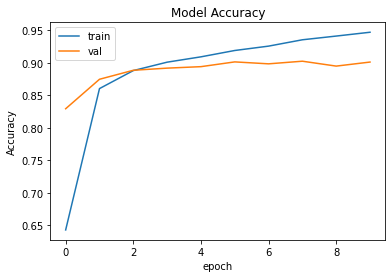

In [ ]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Plotting the loss function

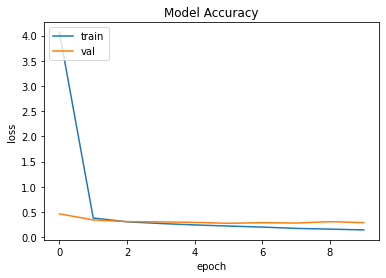

In [ ]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Prediction

1/1 [==============================] - 0s 159ms/step
ankle_boots


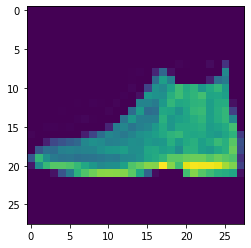

In [ ]:
# There are 10 output labels for the
# Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover',
          'dress', 'coat', 'sandal', 'shirt',
          'sneaker', 'bag', 'ankle_boots']
 
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]
 
print(label)
plt.imshow(testX[:1][0])
plt.show()